# **Helmet detection**

Safety is the most important aspect in construction and related hazardous workplaces. Personal protective equipment(PPE) serves as the first line of defense against accidents.

# Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your YOLOv4 system will be able to process detections over 100 times faster than CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
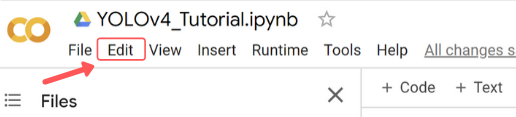
### ii) Click **Notebook Settings** within dropdown
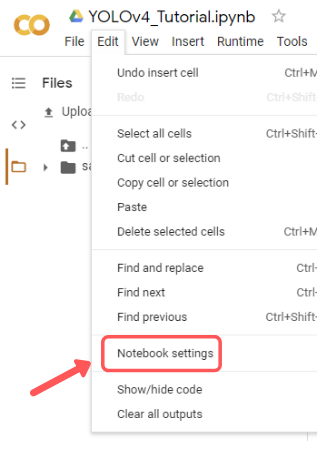
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
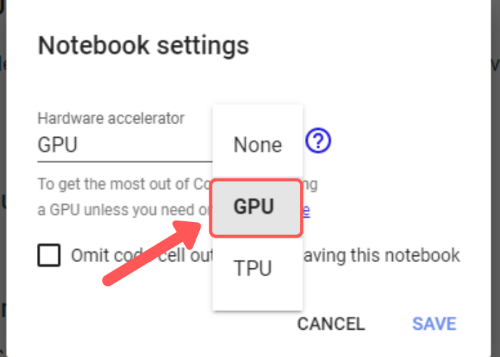

Your notebook should now have GPU enabled!

In [ ]:
!apt-get update
# update the linux environment

We use YOLO for helmet testing. First we downloaded the source code from Github.

YOLO - Neural Networks for Object Detection

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git
# Clone a repository from GitHub to the local machine using Git.

In [ ]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile # Enable OPENCV. OPENCV is used for developing real-time computer vision applications.
!sed -i 's/GPU=0/GPU=1/' Makefile # Enable GPU.Enable GPU acceleration.
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile # Enable CUDNN. CUDA Deep Neural Network. CuDNN provides efficient implementations of common operations used in deep learning.
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile # Enable CUDNN_HALF. CuDNN Half Precision. It enables the use of half-precision floating-point (FP16) data types for deep learning computations.
# Change the current working directory to the darknet directory in the file system.
# Configuring the runtime environment

We enter the Darknet folder and use 'ls' to see the contents of the folder.

In [ ]:
!ls
# List the files and directories in the current working directory.

Yolo,a real-time object detection algorithm system, is based on Darknet, an open source neural network framework written in C and CUDA, so we need to compile(make) the C environment in the environment before we start using it.

In [ ]:
!/usr/local/cuda/bin/nvcc --version
# Check the CUDA version

In [19]:
!make
# Build the darknet framework from the source code in the current working directory.
# Do not worry about any warnings when you run the '!make' cell!

nvcc -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -gencode arch=compute_61,code=[sm_61,compute_61] -gencode arch=compute_70,code=[sm_70,compute_70] -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF --compiler-options "-Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF" -c ./src/blas_kernels.cu -o obj/blas_kernels.o
nvcc -gencode arch=compute_50,code=[sm_50,compute_50] -gencode arch=compute_52,code=[sm_52,compute_52] -gencode arch=compute_61,code=[sm_61,compute_61] -gencode arch=compute_70,code=[sm_70,compute_70] -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF --compiler-options "-Wall -Wfatal-errors -W

In [20]:
!ls
# Check what has been changed after '!make'

3rdparty		darknet_video.py       obj
backup			data		       package.xml
build			dataset		       README.md
build.ps1		docker-compose.yml     results
cfg			Dockerfile.cpu	       Safety_Detection
chart.png		Dockerfile.gpu	       scripts
chart_yolo-voc.png	image_yolov3.sh        src
cmake			image_yolov4.sh        train.txt
CMakeLists.txt		include		       vcpkg.json
darknet			json_mjpeg_streams.sh  vcpkg.json.opencv23
darknet19_448.conv.23	LICENSE		       video_yolov3.sh
DarknetConfig.cmake.in	Makefile	       video_yolov4.sh
darknet_images.py	net_cam_v3.sh
darknet.py		net_cam_v4.sh


In [21]:
! ./darknet
# Run the darknet executable file in the current working directory.

usage: ./darknet <function>


Download the YOLO model.

In [22]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23
# Download a pre-trained convolutional neural network (CNN) model for use with the darknet object detection framework.

--2023-10-11 09:48:02--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23.1’

darknet19_448.conv. 100%[===================>]  75.65M  21.4MB/s    in 4.4s    

2023-10-11 09:48:07 (17.1 MB/s) - ‘darknet19_448.conv.23.1’ saved [79327120/79327120]



In [23]:
!rm -rf /content/darknet/Safety_Detection
# Delete the directory named "Safety_Detection" and all its contents recursively from the path "/content/darknet".

In [24]:
!git clone https://github.com/mohanrajmit/Safety_Detection.git
# Download the helmet dataset from the Github repository.

Cloning into 'Safety_Detection'...
remote: Enumerating objects: 1387, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 1387 (delta 7), reused 7 (delta 7), pack-reused 1378
Receiving objects: 100% (1387/1387), 28.13 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (11/11), done.


Show image and lable.

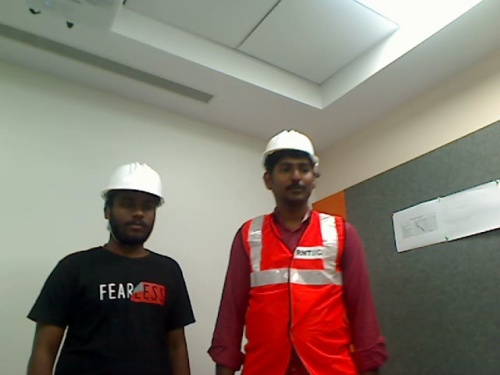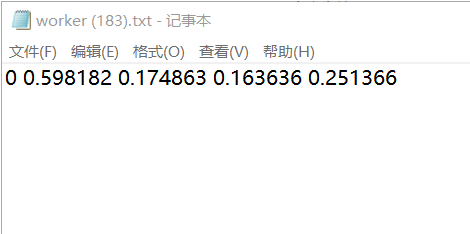

Here we introduce the YOLO data format.
Each row represents the category and position of an object, the first column represents the category of the object (in our data set, it represents the helmet), and the next four columns represent the location information of the object, which are respectively X, Y, W and H. The top left point is the source point (0,0), the bottom right point is (1,1) the distance between the center of the object and the far point is the coordinate (X,Y), and the detection width and height of the object are W,H. The left side of the graph (x,y,w,h) is (0.48,0.63,0.96,0.71).

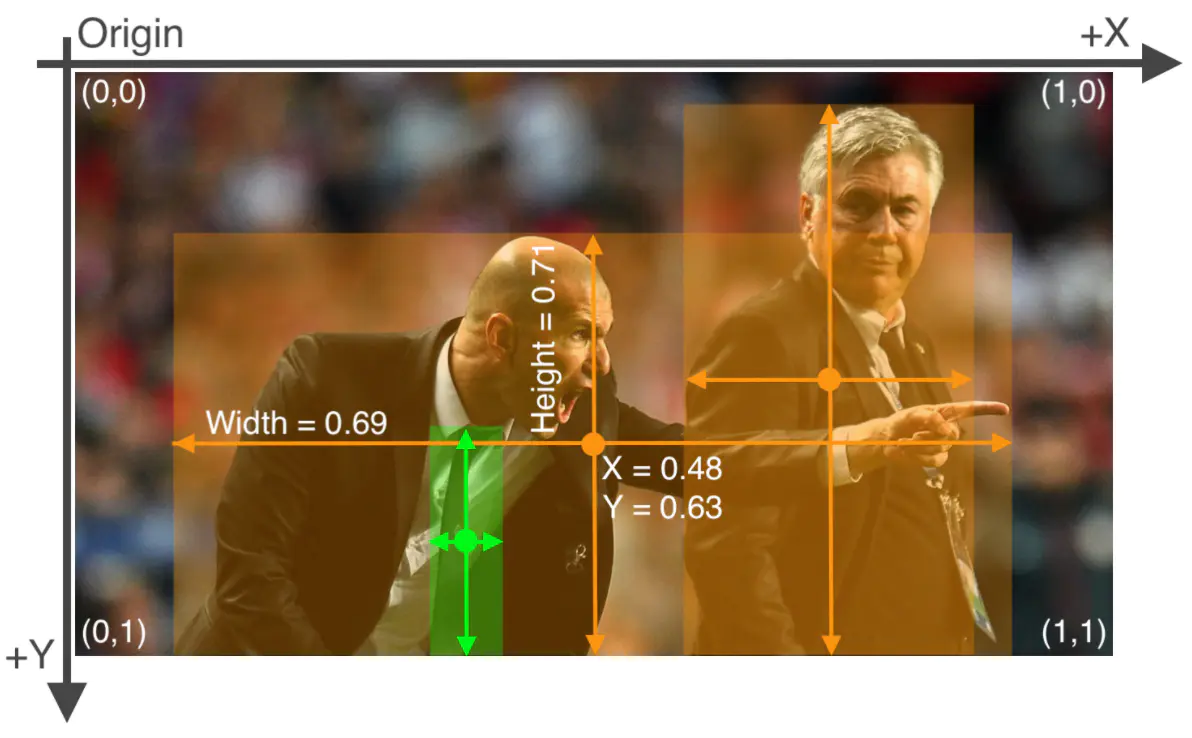

In [25]:
!mv /content/darknet/Safety_Detection/dataset /content/darknet
!mv /content/darknet/Safety_Detection/train.txt /content/darknet
# Move the directory named AAA to BBB.

mv: cannot move '/content/darknet/Safety_Detection/dataset' to '/content/darknet/dataset': Directory not empty


With the training set and model in hand, we can begin formal training. Because the model is larger and the training time is longer.

In [ ]:
!./darknet detector train /content/darknet/Safety_Detection/obj.data cfg/yolo-voc.2.0.cfg darknet19_448.conv.23 -dont_show 0
# Train a YOLO (You Only Look Once) object detection model on the dataset provided in the "obj.data" file using the configuration file "yolo-voc.2.0.cfg" and the pre-trained weights "darknet19_448.conv.23".

 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
yolo-voc
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x 